In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [3]:
train_raw = pd.read_csv('data/training_set_VU_DM.csv')

In [7]:
train_raw.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [35]:
train_raw.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [13]:
# number if NaNs
nan_counts = train_raw.isna().sum()/len(train_raw)

In [34]:
print(nan_counts.loc[nan_counts > 0])

visitor_hist_starrating      0.949204
visitor_hist_adr_usd         0.948977
prop_review_score            0.001485
prop_location_score2         0.219902
srch_query_affinity_score    0.935986
orig_destination_distance    0.324258
comp1_rate                   0.975813
comp1_inv                    0.973871
comp1_rate_percent_diff      0.980954
comp2_rate                   0.591664
comp2_inv                    0.570367
comp2_rate_percent_diff      0.887818
comp3_rate                   0.690565
comp3_inv                    0.667028
comp3_rate_percent_diff      0.904646
comp4_rate                   0.938008
comp4_inv                    0.930690
comp4_rate_percent_diff      0.973563
comp5_rate                   0.551792
comp5_inv                    0.524031
comp5_rate_percent_diff      0.830367
comp6_rate                   0.951565
comp6_inv                    0.947366
comp6_rate_percent_diff      0.980604
comp7_rate                   0.936401
comp7_inv                    0.928117
comp7_rate_p

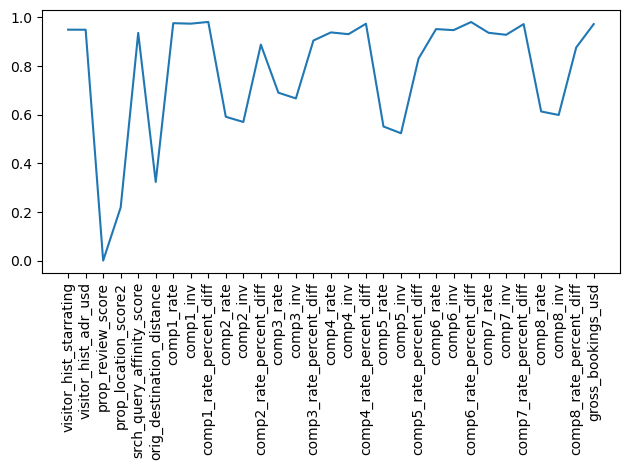

In [33]:
plt.plot(nan_counts.loc[nan_counts > 0])
plt.xticks(np.arange(len(nan_counts.loc[nan_counts > 0])), rotation = 90)
plt.tight_layout()
plt.show()

In [38]:
train_raw.loc[train_raw['booking_bool']== True]

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
12,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,68914,2,3.0,...,NaN,NaN,NaN,NaN,0.0,0.0,11.0,1,114.29,1
63,6,2013-06-05 12:27:51,14,100,NaN,NaN,100,104251,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,162.38,1
68,8,2013-03-20 17:50:44,5,219,NaN,NaN,219,27669,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,96.41,1
194,21,2013-02-18 17:16:25,15,55,NaN,NaN,216,61662,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,222.58,1
211,25,2012-12-11 13:03:42,5,219,NaN,NaN,219,23228,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,47.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958241,332776,2012-11-17 10:02:22,5,32,5.0,321.49,55,106758,4,4.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1,428.84,1
4958275,332781,2013-03-03 15:12:59,5,219,NaN,NaN,219,18007,3,3.5,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,129.94,1
4958304,332782,2012-11-08 18:24:21,19,158,NaN,NaN,158,68398,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,288.25,1
4958321,332784,2013-06-18 14:35:24,24,219,NaN,NaN,100,34966,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,301.40,1


In [53]:
nights = train_raw['gross_bookings_usd'].loc[train_raw['booking_bool']== True]//train_raw['price_usd'].loc[train_raw['booking_bool']== True]


In [57]:
tax = train_raw['gross_bookings_usd'].loc[train_raw['booking_bool']== True]%train_raw['price_usd'].loc[train_raw['booking_bool']== True]/nights

In [58]:
tax/train_raw['price_usd'].loc[train_raw['booking_bool']== True]

12         0.132818
63         0.119862
68         0.134235
194        0.160722
211        0.121429
             ...   
4958241    0.257595
4958275    0.139825
4958304    0.317052
4958321    0.200319
4958345    0.135540
Length: 138390, dtype: float64

<Axes: >

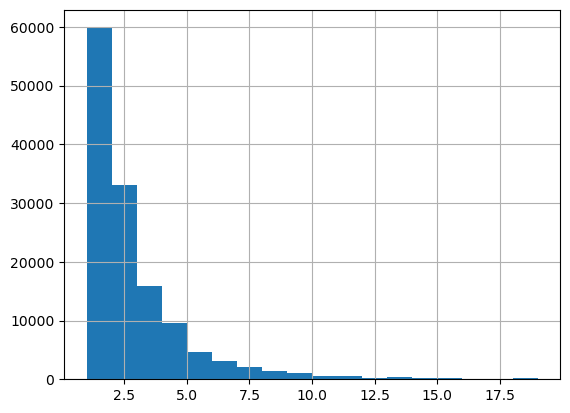

In [64]:
nights.loc[nights != np.inf].hist(bins=np.arange(1,20,1))

<Axes: >

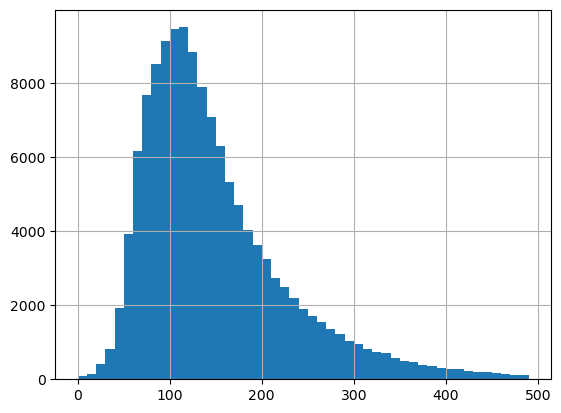

In [72]:
(train_raw['gross_bookings_usd'].loc[train_raw['booking_bool']== True]/nights).hist(bins=np.arange(0,500,10))

<Axes: >

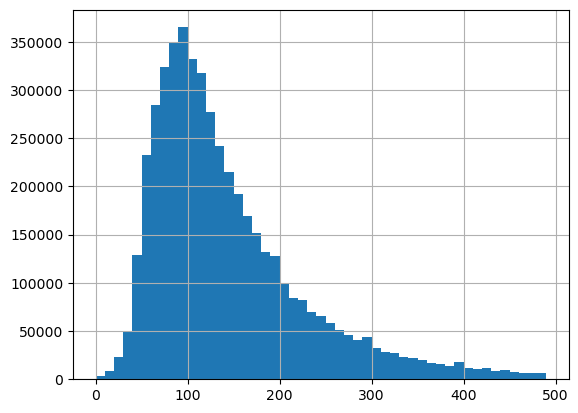

In [70]:
train_raw['price_usd'].hist(bins=np.arange(0,500,10))

<Axes: >

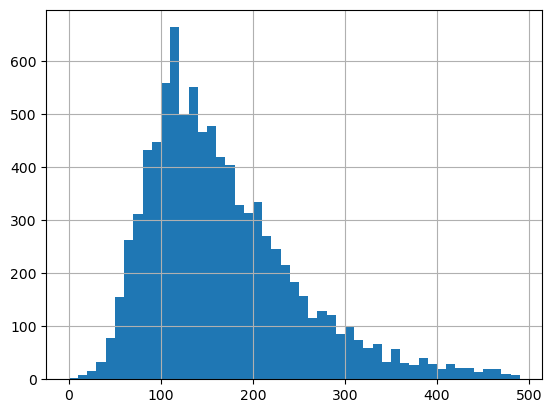

In [80]:
last_price = train_raw['visitor_hist_adr_usd'].loc[(train_raw['booking_bool']== True) & (train_raw['visitor_hist_adr_usd'] > 0)]
last_price.hist(bins=np.arange(0,500,10))

<Axes: >

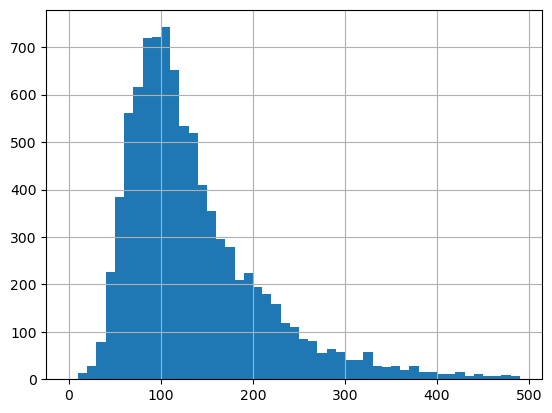

In [81]:
current_price = train_raw['price_usd'].loc[(train_raw['booking_bool']== True) & (train_raw['visitor_hist_adr_usd'] > 0)]
current_price.hist(bins=np.arange(0,500,10))

<Axes: >

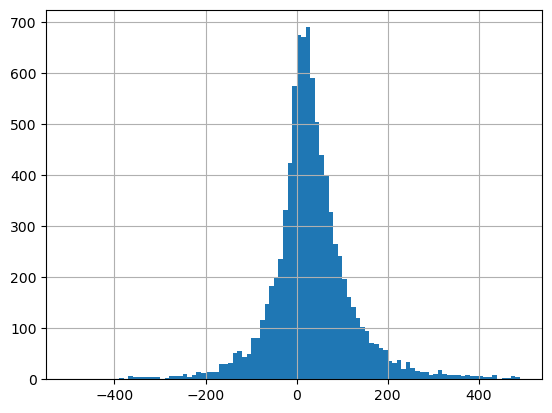

In [83]:
(last_price-current_price).hist(bins=np.arange(-500,500,10))

In [5]:
unq_srch = train_raw['srch_id'].unique()

In [13]:
train_raw['position'].loc[train_raw['srch_id'] == unq_srch[0]]

0     27
1     26
2     21
3     34
4      4
5      7
6     18
7     35
8      3
9     10
10    20
11    19
12    13
13     2
14    15
15    31
16    23
17    36
18     8
19     6
20    28
21     1
22    32
23    12
24    24
25    37
26    33
27    29
Name: position, dtype: int64